# 1. EDA utilisant des kernels Kaggle

[https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook)

On obtient les donnees Home Credit Default Risk (ajouter a Input dans Kaggle directement)

## Parcours notebook et reflexion/modifs au fil de l'eau

In [1]:
# imports

# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CSV dans Kaggle input
KAGGLE_INPUT_PATH = "/kaggle/input/home-credit-default-risk"

# List files available
print(os.listdir(KAGGLE_INPUT_PATH))

['sample_submission.csv', 'bureau_balance.csv', 'POS_CASH_balance.csv', 'application_train.csv', 'HomeCredit_columns_description.csv', 'application_test.csv', 'previous_application.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'bureau.csv']


# Donnees train et HOLDOUT

- CARE! risque de confusion, dans Kaggle le TEST c'est ce qui etait utilise pour la compet donc TARGETS manquants

In [3]:
# Training data
app_train = pd.read_csv(KAGGLE_INPUT_PATH + '/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# check has target
app_train["TARGET"].head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [5]:
# Testing data features
app_test = pd.read_csv(KAGGLE_INPUT_PATH+'/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# check has NO target
print("TARGET" in app_test.columns)

False


## Analyse exploratoire

In [7]:
app_train['TARGET'].value_counts()


TARGET
0    282686
1     24825
Name: count, dtype: int64

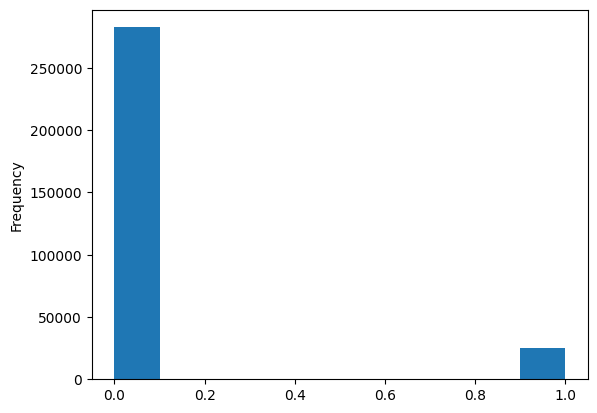

In [8]:
app_train['TARGET'].astype(int).plot.hist();

## Remarque - desequilibrage !

- on utilisera SMOTE etc pour l'entrainement de modeles


---

## Valeurs manquantes

In [9]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Typage colonnes et nettoyage

In [11]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

### Nombre de valeurs par col

In [12]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Valeurs categorielles - label encoding (si == 2 labels) else one-hot encoding ( > 2 labels)

In [13]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [14]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


# Realignement des colonnes

- apres le one hot encoding, nombre different de colonnes entre train et holdout

In [15]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


## Valeurs aberrantes

### Days_birth sont negatives car rapportes a aujourd'hui (enfin date de demande du pret)

In [16]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

### Days_employed

- Valeurs aberrantes ! Plus de 1000 ans d'emploi O_o

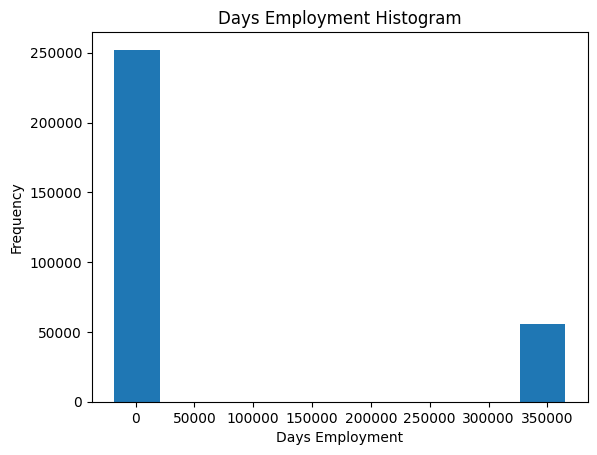

In [17]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

On fait un simple remplacement pour ce valeurs

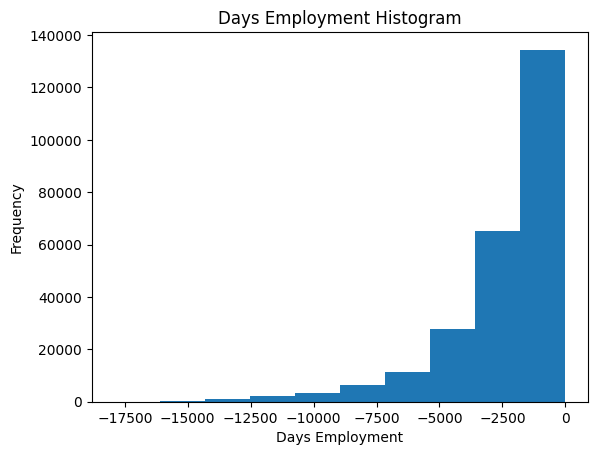

In [18]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [19]:
# meme traitement sur le holdout

app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## Explo des correlations

In [20]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

## Etudier l'age

Explication pour prendre la valeuer absolue:

```
Let's take a look at some of more significant correlations: the DAYS_BIRTH is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1!) Looking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.
```

In [21]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

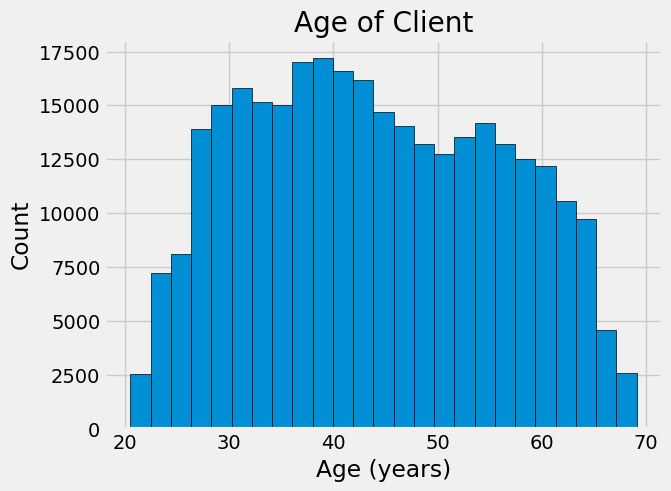

In [22]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

# KDE en fonction des TARGET

**RAPPEL: 0 c'est "bon client"/rembourse OK, et 1 c'est "mauvais client"**

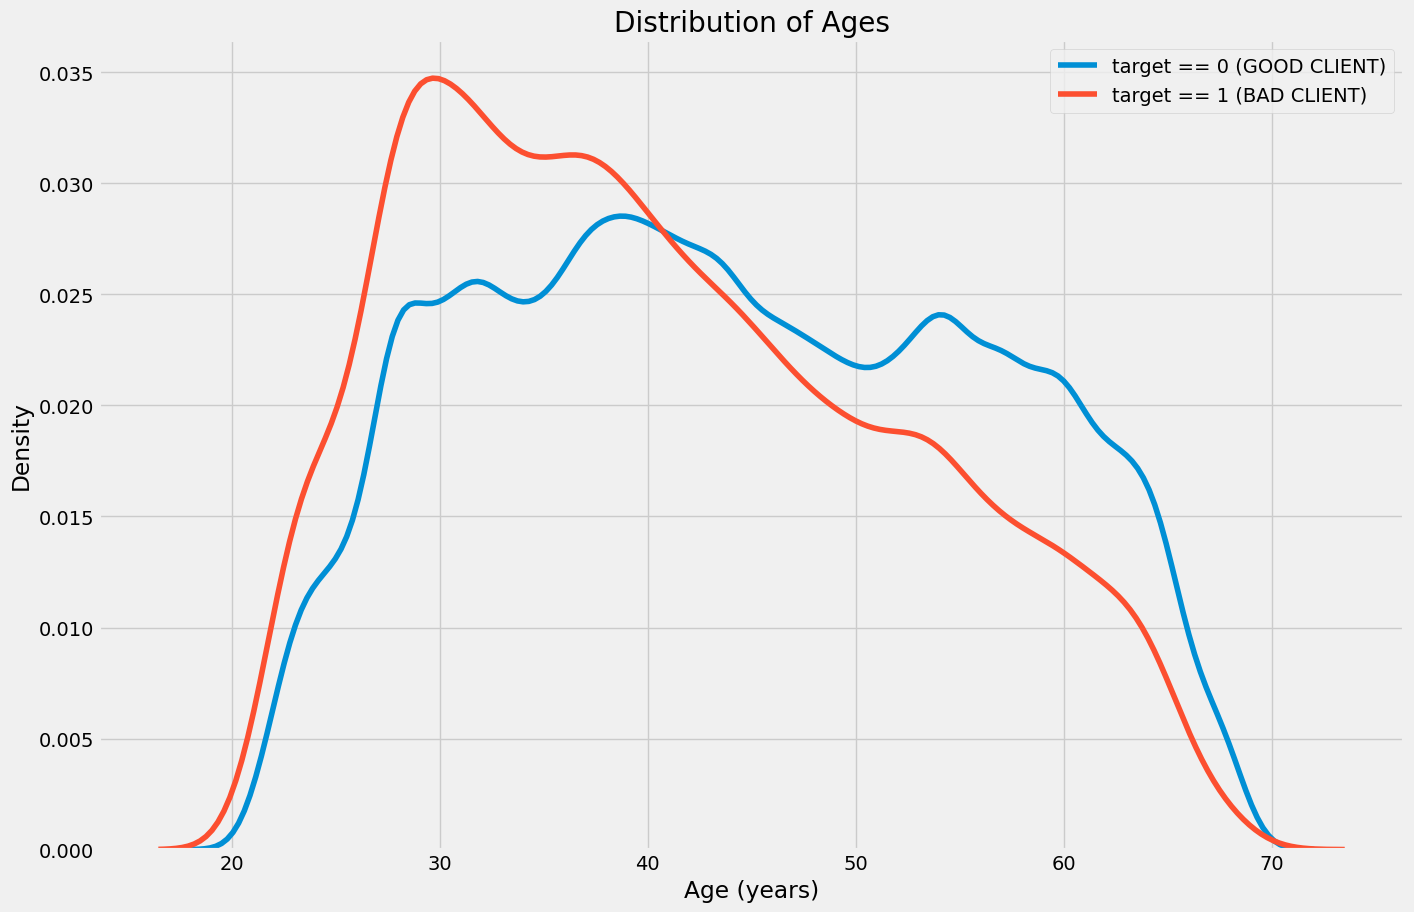

In [23]:
plt.figure(figsize = (15, 10))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0 (GOOD CLIENT)')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1 (BAD CLIENT)')

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend()

---

# 2. Process dataframes and merging

- Maintenant on reprend le travail fourni ici [https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features](https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features)

### Imports

In [24]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Fonctions pour processing et jointures

In [25]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [26]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

### Fonctions pour tables/CSV individuelles

In [27]:
# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv', nrows= num_rows)
    test_df = pd.read_csv('/kaggle/input/home-credit-default-risk/application_test.csv', nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    #df = df.append(test_df).reset_index() # outdated/vielle version de pandas
    df = pd.concat([df, test_df], ignore_index=True)

    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('/kaggle/input/home-credit-default-risk/bureau.csv', nrows = num_rows)
    bb = pd.read_csv('/kaggle/input/home-credit-default-risk/bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv('/kaggle/input/home-credit-default-risk/previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv('/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg
    
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv('/kaggle/input/home-credit-default-risk/installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv('/kaggle/input/home-credit-default-risk/credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

## Fonction pour effectuer les jointures

In [28]:
def process_dataframes(debug=False):
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()

    return df

In [29]:
#/kaggle/input/home-credit-default-risk

In [30]:
df = process_dataframes()

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 28s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 30s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 26s
Installments payments df shape: (339587, 26)
Process installments payments - done in 39s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 24s


In [31]:
df.shape

(356251, 797)

In [32]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN',
       'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN',
       'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR',
       'CC_COUNT'],
      dtype='object', length=797)

In [33]:
df["TARGET"].value_counts()

TARGET
0.0    282682
1.0     24825
Name: count, dtype: int64

In [34]:
df["TARGET"].isna().sum()

48744

# Nettoyage - doublons, valeurs manquantes, outliers etc.


### Suppression de colonnes avec beaucoup de valeurs manquantes

- note: feedback mentor apres problemes memoire/calcul -> utiliser un dataframe plus petit pour faire les tests OK

In [35]:
df.isna().mean().sort_values()

SK_ID_CURR                               0.000000
OCCUPATION_TYPE_Private service staff    0.000000
OCCUPATION_TYPE_Realty agents            0.000000
OCCUPATION_TYPE_Sales staff              0.000000
OCCUPATION_TYPE_Secretaries              0.000000
                                           ...   
REFUSED_AMT_DOWN_PAYMENT_MEAN            0.852343
REFUSED_RATE_DOWN_PAYMENT_MIN            0.852343
REFUSED_RATE_DOWN_PAYMENT_MAX            0.852343
REFUSED_AMT_DOWN_PAYMENT_MIN             0.852343
REFUSED_RATE_DOWN_PAYMENT_MEAN           0.852343
Length: 797, dtype: float64

In [36]:
# on supprimse si > 50% de V.M.

NA_THRESHOLD = 0.5

df = df.dropna(axis=1, thresh=int(NA_THRESHOLD * len(df)))

In [37]:
df.shape

(356251, 564)

In [38]:
df[df["TARGET"].notnull()].shape, df[df["TARGET"].isnull()].shape

((307507, 564), (48744, 564))

### Valeurs inf

- on remplace par des Nan

In [39]:
np.isinf(df).values.ravel().sum()

59

In [40]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
np.isinf(df).values.ravel().sum()

0

### Imputation pour les valeurs manquantes restantes

In [41]:
df.dtypes.value_counts()

float64    389
bool       133
int64       42
Name: count, dtype: int64

**Imputation:**

**D'abord on attribue un dummy label de 999 aux V.M du TARGET - ce sont les donnees qui proviennent du CSV de holdout**

- pour les float on prendra la **moyenne**
- pour les autres (CARE! ils proviennent aussi du one hot encoding et du feature engineering) on prendra la **most frequent**

In [42]:
df.select_dtypes(include=bool).columns

Index(['NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans',
       'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family',
       'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A',
       'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse, partner',
       'NAME_TYPE_SUITE_Unaccompanied', 'NAME_INCOME_TYPE_Businessman',
       ...
       'HOUSETYPE_MODE_terraced house', 'WALLSMATERIAL_MODE_Block',
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=133)

In [43]:
# dummy VM remplacement pour les target
DUMMY_NA_TARGET_VALUE = 999

print(df["TARGET"].isna().mean())
df["TARGET"] = df["TARGET"].fillna(value=DUMMY_NA_TARGET_VALUE)
print(df["TARGET"].isna().mean())

0.1368248790880587
0.0


In [44]:
# imputation pour les valeurs float
float_cols = df.select_dtypes(['float64']).columns.to_list()
#print(float_cols)

df[float_cols] = df[float_cols].fillna(df[float_cols].mean())

In [45]:
# imputation pour les bools/ints
bool_int_cols = df.select_dtypes(['int64', 'bool']).columns.to_list()
#print(bool_int_cols)

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

df[bool_int_cols] = imputer.fit_transform(df[bool_int_cols])

In [47]:
df.isna().mean().sort_values()

SK_ID_CURR                             0.0
PREV_CODE_REJECT_REASON_LIMIT_MEAN     0.0
PREV_CODE_REJECT_REASON_HC_MEAN        0.0
PREV_CODE_REJECT_REASON_CLIENT_MEAN    0.0
PREV_NAME_PAYMENT_TYPE_nan_MEAN        0.0
                                      ... 
ORGANIZATION_TYPE_Transport: type 4    0.0
ORGANIZATION_TYPE_University           0.0
ORGANIZATION_TYPE_XNA                  0.0
ORGANIZATION_TYPE_Trade: type 7        0.0
INSTAL_COUNT                           0.0
Length: 564, dtype: float64

### Doublons

- all good :D

In [48]:
df[df.duplicated()].shape

(0, 564)

# Export des datasets processed

- on stock le TRAIN (cad ou le TARGET est renseigne, soit 0 ou 1) et le HOLDOUT (ou le TARGET a ete attribue un dummy de 999) qui servira pour le data drift etc.

In [49]:
df_train = df.loc[df["TARGET"] < DUMMY_NA_TARGET_VALUE, :]
df_holdout = df.loc[df["TARGET"] == DUMMY_NA_TARGET_VALUE, :]

In [50]:
NEED_BACKUP=False
# ca prend un temps fou dans Kaggle, le faire une fois en local

if NEED_BACKUP:
    df_train.to_csv("df_train.csv", index=False)
    df_holdout.to_csv("df_holdout.csv", index=False)


---

---

---

# Entrainement de modeles

TODO: copier en local pour tracage avec MLflow

- ici test pipeline pour 1 modele

---

## Credit - liens/ressources utilisees

- [https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)
- [https://stackoverflow.com/questions/50245684/using-smote-with-gridsearchcv-in-scikit-learn](https://stackoverflow.com/questions/50245684/using-smote-with-gridsearchcv-in-scikit-learn)
- Claude 3.5 O_o

---

## Test train split

- CARE! j'ai choisi le mot HOLDOUT pour les donnees sans TARGET, donc ici on importe le fichier qui contient des TARGET, que l'on va maintenant separarer en train et en test


In [51]:
df_train.shape

(307507, 564)

In [52]:
RANDOM_SEED = 123

# UPDATE: ahhhh

- En faisant la v1 jusqu'au bout avec un premier modele simple (pour tester la creation d'API etc) je me suis rendu compte de ce que disait mentor; aussi garder un "mini jeu de donnees" pour tester l'API
- Je croyais que c'etait le HOLDOUT mais ce sera pour le data drift etc.
- Ici l'idee c'est de prendre par ex. 50 rangees, apres transformation etc., que l'on pourra utiliser comme "fake base de donnees" dans notre interface; comme ca on selectionne **par ID du client, par exemple** et l'API fait l'inference sur les colonnes; c'est comme si on accedait a une base de donnees

**DONC:** on va prendre 50 rangees du `df_train` pour creer `prod_client_database_example`

In [53]:
# on prend les 50 premieres rangees par ex
prod_client_database = df_train.iloc[:50, :]
prod_client_database.to_csv("prod_client_database_example.csv", index=False)

df_train = df_train.iloc[50:, :]

In [54]:
X = df_train.drop(columns=["SK_ID_CURR", "TARGET"])
y = df_train["TARGET"]

print(X.shape, y.shape)

(307457, 562) (307457,)


In [55]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
50,1,0,0,0,54000.0,135000.0,6750.0,135000.0,0.014520,-12406,...,18615.803852,6.831305e+05,5282.777431,140044.278922,19003.856009,6.904888e+05,-328.436694,-922.094466,-42103.193758,40.06432
51,0,1,0,1,540000.0,675000.0,34596.0,675000.0,0.026392,-18632,...,68871.628421,1.308561e+06,5621.355000,416819.610000,68871.628421,1.308561e+06,-70.000000,-704.315789,-13382.000000,19.00000
52,0,1,1,0,76500.0,454500.0,14661.0,454500.0,0.028663,-12282,...,36424.425000,2.185465e+05,6818.400000,102732.750000,51424.425000,3.085465e+05,-333.000000,-396.000000,-2376.000000,6.00000
53,1,0,0,2,225000.0,314055.0,16164.0,238500.0,0.006629,-10473,...,37177.078442,2.862635e+06,145.935000,350120.520000,40008.868831,3.080683e+06,-75.000000,-703.545455,-54173.000000,77.00000
54,0,1,1,0,81000.0,675000.0,32472.0,675000.0,0.010006,-18611,...,69419.445000,1.041292e+06,29745.000000,440267.175000,69419.445000,1.041292e+06,-44.000000,-238.000000,-3570.000000,15.00000


In [56]:
y.head()

50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
Name: TARGET, dtype: float64

## Split puis SMOTE pour equilibrage

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_SEED, stratify=y)

#### J'ai suivi le tuto ici

[https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [58]:
!pip install imbalanced-learn

In [59]:
# check version number
import imblearn
print(imblearn.__version__)

0.12.4


In [60]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [61]:
from collections import Counter

In [62]:
# summarize class distribution
counter = Counter(y_train)
print(counter) # ceci SANS le SMOTE donc

Counter({0.0: 226108, 1.0: 19857})


In [63]:
# define pipeline
# over = SMOTE(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=1) # <--- on ne veut pas du under sampling?
# steps = [('o', over), ('u', under)]
# #over = SMOTE(random_state=RANDOM_SEED)
# #steps = [('o', over)]
# pipeline = Pipeline(steps=steps)

In [64]:
# resultats bizzares avec over et under sampling
over = SMOTE(random_state=RANDOM_SEED)
steps = [('o', over)]
smote_pipeline = Pipeline(steps=steps)

In [65]:
# transform the dataset
X_train_w_smote, y_train_w_smote = smote_pipeline.fit_resample(X_train, y_train)

# summarize the new class distribution
counter_w_smote = Counter(y_train_w_smote)
print(counter_w_smote)

Counter({0.0: 226108, 1.0: 226108})


In [66]:
print(X_train_w_smote.shape, y_train_w_smote.shape,)

(452216, 562) (452216,)


## Scaler

- **UPDATE:** je n'arretais pas d'avoir des resultats bizarres avec les scalers (avant/apres SMOTE, different types de scaler etc).
- debug eventuellement apres mentor

In [67]:
# from sklearn.preprocessing import RobustScaler, StandardScaler

# robust_scaler = RobustScaler().fit(X_train_w_smote) # pour gerer les outliers
# standard_scaler = StandardScaler().fit(X_train_w_smote)

# X_train_w_scaler = standard_scaler.transform(X_train_w_smote)
# X_test_w_scaler = standard_scaler.transform(X_test)

# Creation score customise metier

- prendre en compte le cout d'accorder a tort un credit a quelqu'un qui ne remourse pas
- utiliser un score customise pour le metier (voir intitule du projet)

On prend en compte l'impact metier plus consequent d'une erreur "pred: BON CLIENT -> actual: MAUVAIS" (banque risque de perdre gros) par rapport a une erreur "pred: MAUVAIS -> actual: BON" (banque "laisse filer" un client donc manque de revenu)

**L'intitule dit qu'on peut prendre comme "cout" un facteur 10x relatif pour ces 2 erreurs**

#### Calcul / rappel

- RAPPEL que TARGET == 1 veut dire **pret non rembourse!!!**

On perd de l'argent lorsque :

- le modele obtient un FP (car on predit P, donc que le client NE REMBOURSE PAS, alors qu'on aurait du accepter le client, donc manque a gagner de 1 UNITE)
- le modele obtient un FN (car on predit N, donc que le client VA REMBOURSER, alors qu'il ne remboursera pas, donc on PERD 10x LE REVENU MOYEN PAR CLIENT)

Donc une fonction de cout simple (pas besoin de normaliser car toujours meme nombre d'observations ?)

`cost = fp * 1 + fn * 10`

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
# CARE!!!!!! DON'T CONFUSE THE ORDER, I COPIED SKLEARN DOCS
"""
confusion_matrix(y_true, y_pred)
                                     y_true,        y_pred
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
"""

def get_custom_score_metier(y_true, y_pred):
    COEFF_METIER_POUR_FN = 10
    tn,fp,fn,tp = confusion_matrix(y_true, y_pred).ravel()
    custom_cost_to_minimise = fp*1 + fn*COEFF_METIER_POUR_FN
    return custom_cost_to_minimise  

### Fonctions generiques pour scoring de modele

- on utilisera les p/r/f1 standards, ainsi que le AUC (voir intitule)
- avec aussi le `custom_score_metier`

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [71]:
def get_all_scores_from_classifier(y_predict_probas, x_values, y_true, threshold_to_use=0.5):
    #y_predict_probas = classifier.predict_proba(x_values)[:, 1] # (N, k) where N is number of samples (300,000+) and k is numer of labels
    y_pred = np.where(y_predict_probas > threshold_to_use, 1, 0) # on utilise les proba des ==1
    
    # calcule les metriques individuelles
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # ROC AUC -- CARE! utilise les PROBAS
    roc_auc = roc_auc_score(y_true, y_predict_probas)
    # roc auc curve
    roc_curve_ = roc_curve(y_true, y_predict_probas)

    # confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    
    # le custom cout metier
    custom_score_metier = get_custom_score_metier(y_true, y_pred)
    return {
        "precision":precision,
        "recall":recall,
        "f1":f1,
        "roc_auc":roc_auc,
        "custom_score_metier":custom_score_metier,
        "confusion_matrix":cm,
        "roc_auc_curve":roc_curve_
        
    }

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay

# CREDIT: (pour avor pourcentages, meilleur que CMDisplay)
# https://stackoverflow.com/questions/20927368/how-to-normalize-a-confusion-matrix
# and Claude 3.5
def plot_confusion_matrix(cm):
    #cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(15, 15))
    descriptions = [
        "TN - pred rembourse, et client rembourse",
        "FP - pred non rembourse, mais client rembourse",
        "FN - pred rembourse, mais client ne rembourse pas",
        "TP - pred non rembourse, et client ne rembourse pas"
    ]
    percentages = [
        round(x,2) for x in cm.flatten() / np.sum(cm)
    ]
    # claude O_o //
    tmp = [f"{d}\nPourcentage : {p}" for d,p in zip(descriptions, percentages)]
    annot_with_description = np.asarray(tmp).reshape(2, 2)
    sns.heatmap(cm, annot=annot_with_description, fmt='', xticklabels=["rembourse/0", "ne rembourse pas/1"], yticklabels=["rembourse/0", "ne rembourse pas/1"])
    #sns.heatmap(cmn, annot=True, fmt='.2f')
    plt.title("Confusion matrix display")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)
    

# CREDIT:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
def plot_roc_curve(data, roc_auc_calculated):
    # unpack
    fpr, tpr, threshold = data

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_calculated)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# plot threshold custom score exploration
# CREDIT: Claude 3.5 O_o
def plot_custom_score_for_thresholds(y_predict_probas, y_test):
    threshold_values = [x/100 for x in range(0, 101, 1)]
    scores = []
    for threshold in threshold_values:
        y_pred = (y_predict_probas >= threshold).astype(int)        
        custom_score = get_custom_score_metier(y_true=y_test, y_pred=y_pred)
        scores.append(custom_score)

    # notre custom score est a MINIMISER donc on chercher le argmin des scores[]
    idx = np.argmin(scores)
    best_threshold, lowest_custom_score = threshold_values[idx], scores[idx]
    
    plt.subplots(1, figsize=(8, 5))
    plt.plot(threshold_values, scores)
    plt.axvline(best_threshold, lw=1, c='green', label=f"Best threshold : {best_threshold}")
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
    plt.title("Study of varying threshold choice on total cost to bank\nNOTE: LOWER IS BETTER")
    plt.xlabel("Threshold used for classification")
    plt.ylabel("Business score")
    plt.show()

---

# Entrainer une LogisticRegression pour voir de bout en bout

In [73]:
import time
from sklearn.linear_model import LogisticRegression


In [74]:
clf_logistic_regression =  LogisticRegression()

tik = time.time()
clf_logistic_regression.fit(X_train_w_smote, y_train_w_smote)
tok = time.time()
print("DONE : time = ", tok-tik)



DONE : time =  24.729385375976562


In [75]:
# -- CALCULATE Y PREDICT PROBAS --
y_predict_probas = clf_logistic_regression.predict_proba(X_test)[:, 1]

test_res = get_all_scores_from_classifier(y_predict_probas=y_predict_probas,
                                          x_values=X_test,
                                          y_true=y_test)

print(test_res)

{'precision': 0.12366154093873279, 'recall': 0.30942788074133765, 'f1': 0.17670405522001725, 'roc_auc': 0.5967811720184936, 'custom_score_metier': 45165, 'confusion_matrix': array([[45643, 10885],
       [ 3428,  1536]]), 'roc_auc_curve': (array([0.00000000e+00, 1.76903481e-05, 7.07613926e-05, ...,
       9.99911548e-01, 9.99911548e-01, 1.00000000e+00]), array([0.        , 0.        , 0.        , ..., 0.99979855, 1.        ,
       1.        ]), array([1.99976148e+00, 9.99761485e-01, 9.96064833e-01, ...,
       7.35202783e-04, 5.73181304e-04, 1.39995191e-13]))}


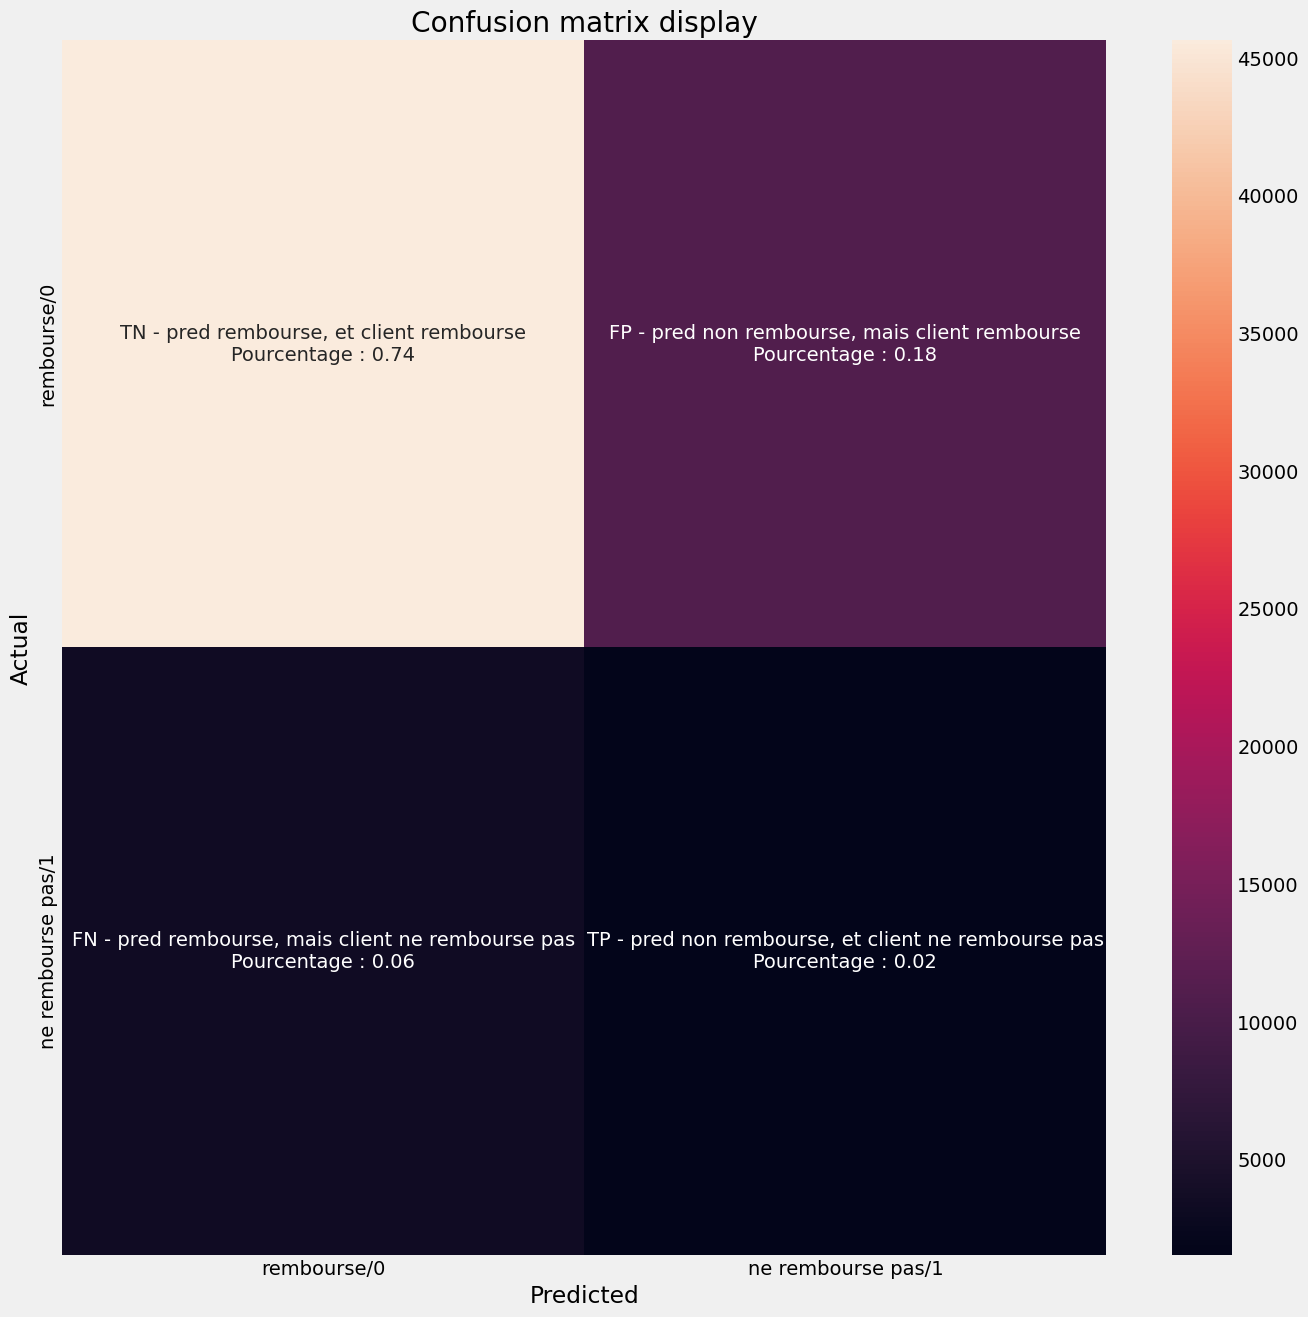

In [76]:
plot_confusion_matrix(test_res["confusion_matrix"])

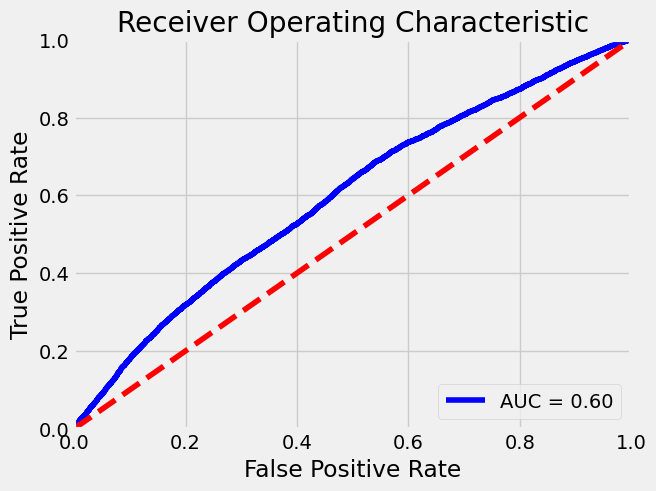

In [77]:
plot_roc_curve(data=test_res["roc_auc_curve"], roc_auc_calculated=test_res["roc_auc"])

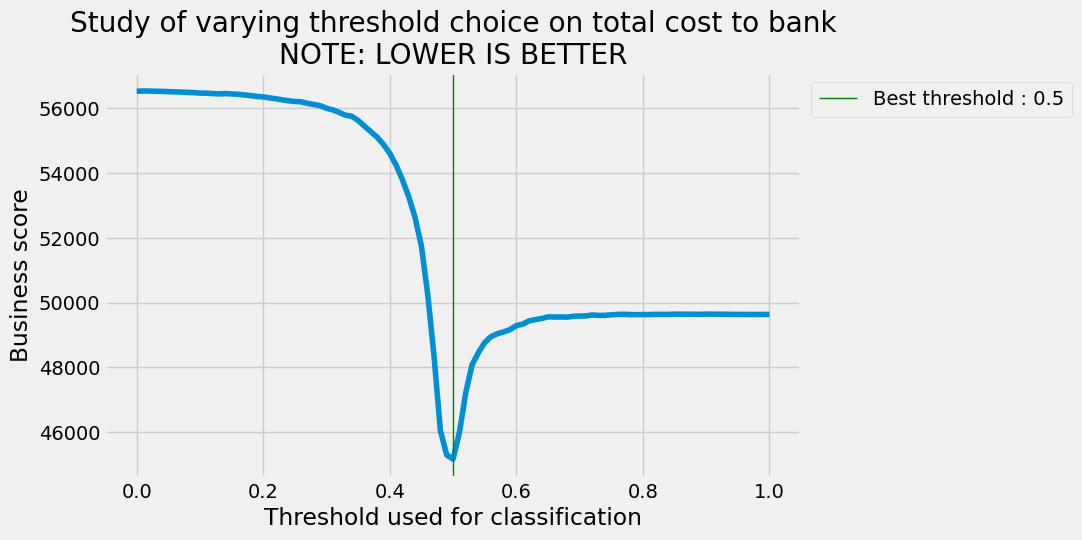

In [78]:
plot_custom_score_for_thresholds(y_predict_probas, y_test)

# Saving logistic regression model

In [79]:
# https://stackoverflow.com/questions/56107259/how-to-save-a-trained-model-by-scikit-learn

import pickle

best_model_name = "prod-logistic-regression.pkl"

with open("/kaggle/working/" + best_model_name, "wb") as fo:
    pickle.dump(clf_logistic_regression, fo)

# Explainability - valeurs SHAP

- On regarde SHAP sur le dataset global, et en local (pour un client predit en 0 et en 1 aussi)

In [80]:
import shap

### References

[https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability](https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability)

and docs:

[https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

In [92]:
explainer = shap.Explainer(clf_logistic_regression, X_train_w_smote)
shap_values = explainer.shap_values(X_train_w_smote)

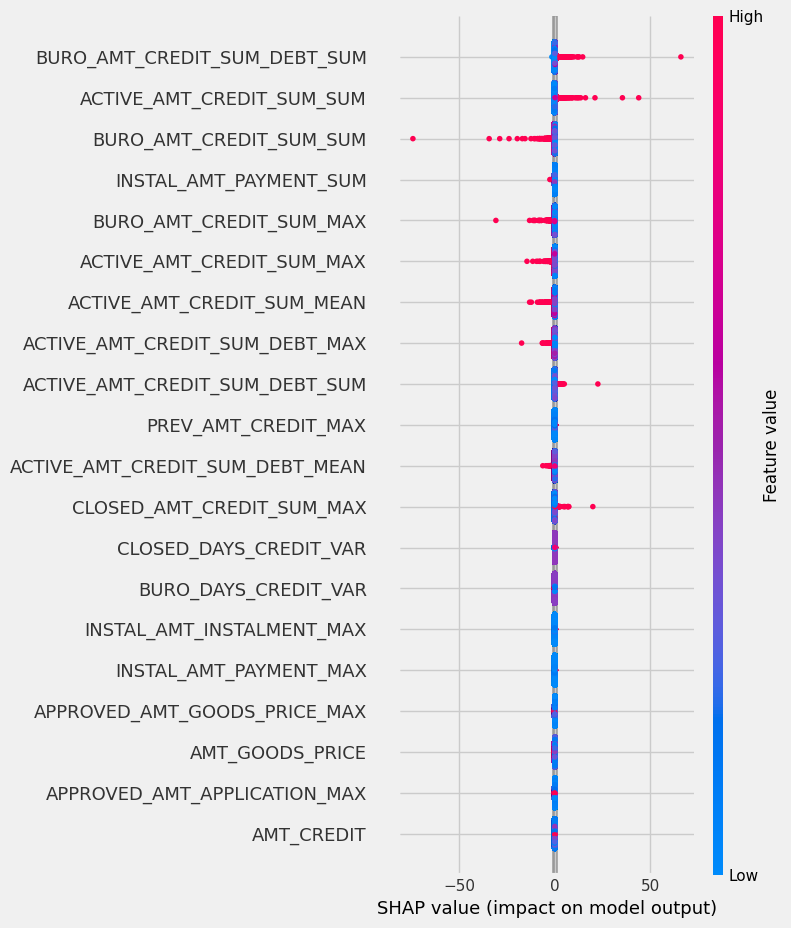

In [93]:
shap.summary_plot(shap_values, X_train_w_smote)

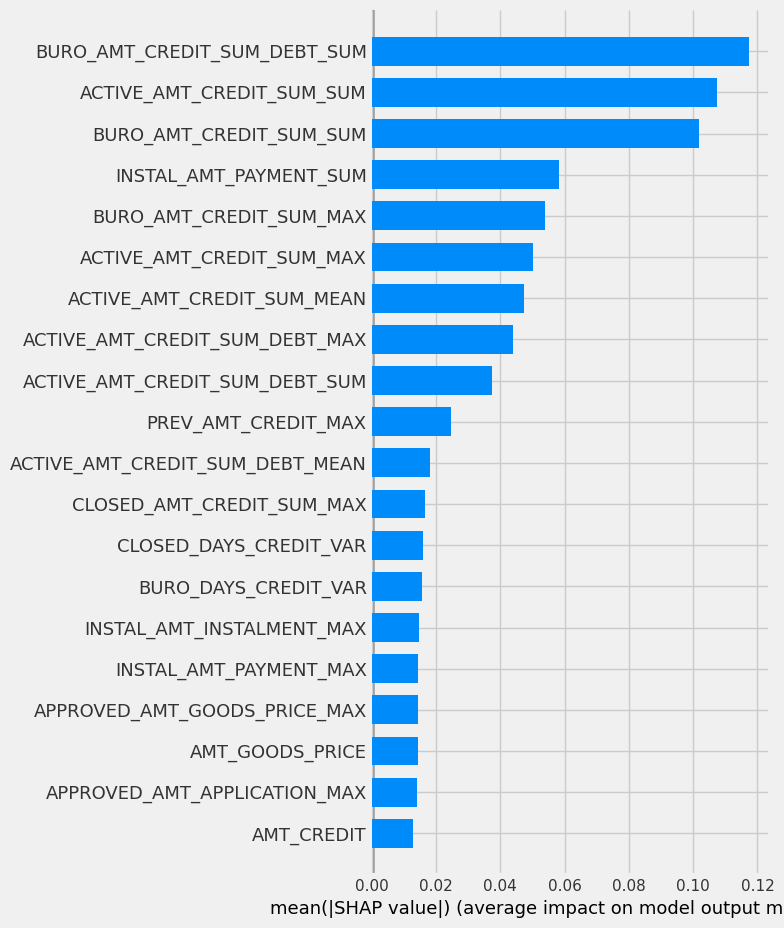

In [94]:
features_from_dataset = X_train_w_smote.columns.to_list()

shap.summary_plot(shap_values, plot_type='bar', max_display=20, feature_names=features_from_dataset)

In [90]:
features_from_dataset

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

#### SHAP force plot

- On trouve un index ou le client ne rembourse pas, **c.a.d TARGET == 1**
- et un index ou le client rembourse **c.a.d TARGET == 0**

In [101]:
# un client qui ne rembourse pas
y_train[y_train == 1.0].head(3)

52637     1.0
297126    1.0
178968    1.0
Name: TARGET, dtype: float64

In [102]:
# un client qui rembourse
y_train[y_train == 0.0].head(3)

36588     0.0
66683     0.0
278005    0.0
Name: TARGET, dtype: float64

In [103]:
idx_client_ne_rembourse_pas = 52637
idx_client_rembourse = 36588

Analyse Shapley locale pour un client qui ne rembourse pas son pret


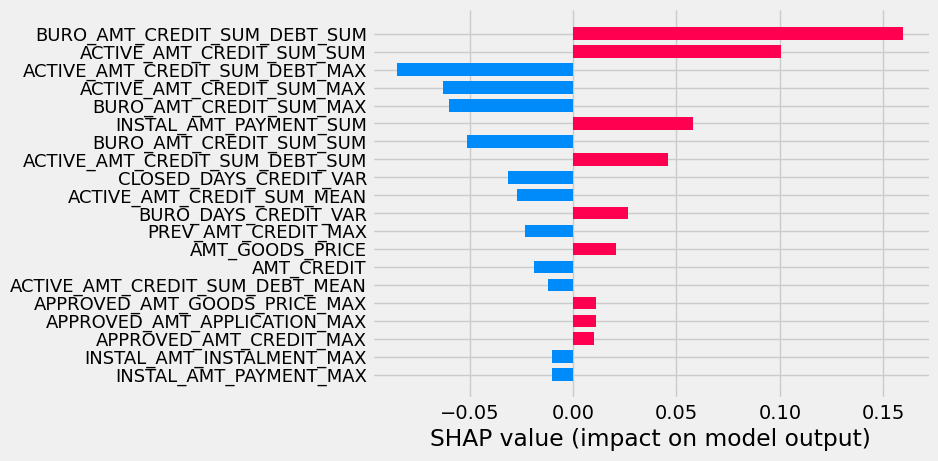

In [105]:
print("Analyse Shapley locale pour un client qui ne rembourse pas son pret")
shap.bar_plot(shap_values[idx_client_ne_rembourse_pas], feature_names=features_from_dataset, max_display=20)

Analyse Shapley locale pour un client qui rembourse bien son pret


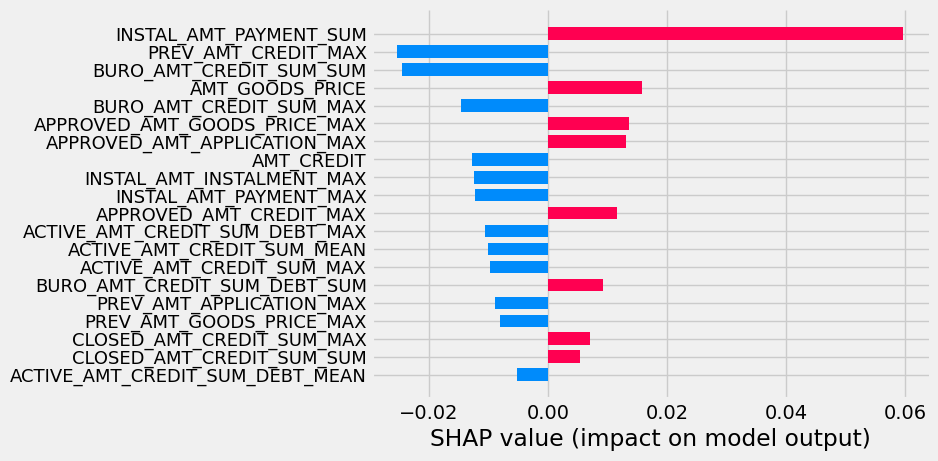

In [107]:
print("Analyse Shapley locale pour un client qui rembourse bien son pret")
shap.bar_plot(shap_values[idx_client_rembourse], feature_names=features_from_dataset, max_display=20)

# Train a Light GBM

In [111]:
clf_lgbm = LGBMClassifier(random_state=RANDOM_SEED)

## Fix error :

- get `LightGBMError: Do not support special JSON characters in feature name.`
- googled : [https://stackoverflow.com/questions/60582050/lightgbmerror-do-not-support-special-json-characters-in-feature-name-the-same](https://stackoverflow.com/questions/60582050/lightgbmerror-do-not-support-special-json-characters-in-feature-name-the-same)


In [113]:
import re
X_train_w_smote = X_train_w_smote.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [114]:
tik = time.time()
print("Starting fitting model ....")
clf_lgbm.fit(X_train_w_smote, y_train_w_smote)
tok = time.time()
print("DONE : time = ", tok-tik)

Starting fitting model ....
[LightGBM] [Info] Number of positive: 226108, number of negative: 226108
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.743340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94972
[LightGBM] [Info] Number of data points in the train set: 452216, number of used features: 537
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
DONE : time =  57.30561900138855


In [115]:
y_predict_probas_lgbm = clf_lgbm.predict_proba(X_test)[:, 1]

test_res_lgbm = get_all_scores_from_classifier(y_predict_probas=y_predict_probas_lgbm,
                                          x_values=X_test,
                                          y_true=y_test)

print(test_res_lgbm)

{'precision': 0.44761904761904764, 'recall': 0.028404512489927477, 'f1': 0.05341920818336807, 'roc_auc': 0.7592571446483746, 'custom_score_metier': 48404, 'confusion_matrix': array([[56354,   174],
       [ 4823,   141]]), 'roc_auc_curve': (array([0.       , 0.       , 0.       , ..., 0.9957897, 0.9957897,
       1.       ]), array([0.00000000e+00, 2.01450443e-04, 1.00725222e-03, ...,
       9.99798550e-01, 1.00000000e+00, 1.00000000e+00]), array([1.94586028, 0.94586028, 0.81590094, ..., 0.01104251, 0.01104232,
       0.00592998]))}


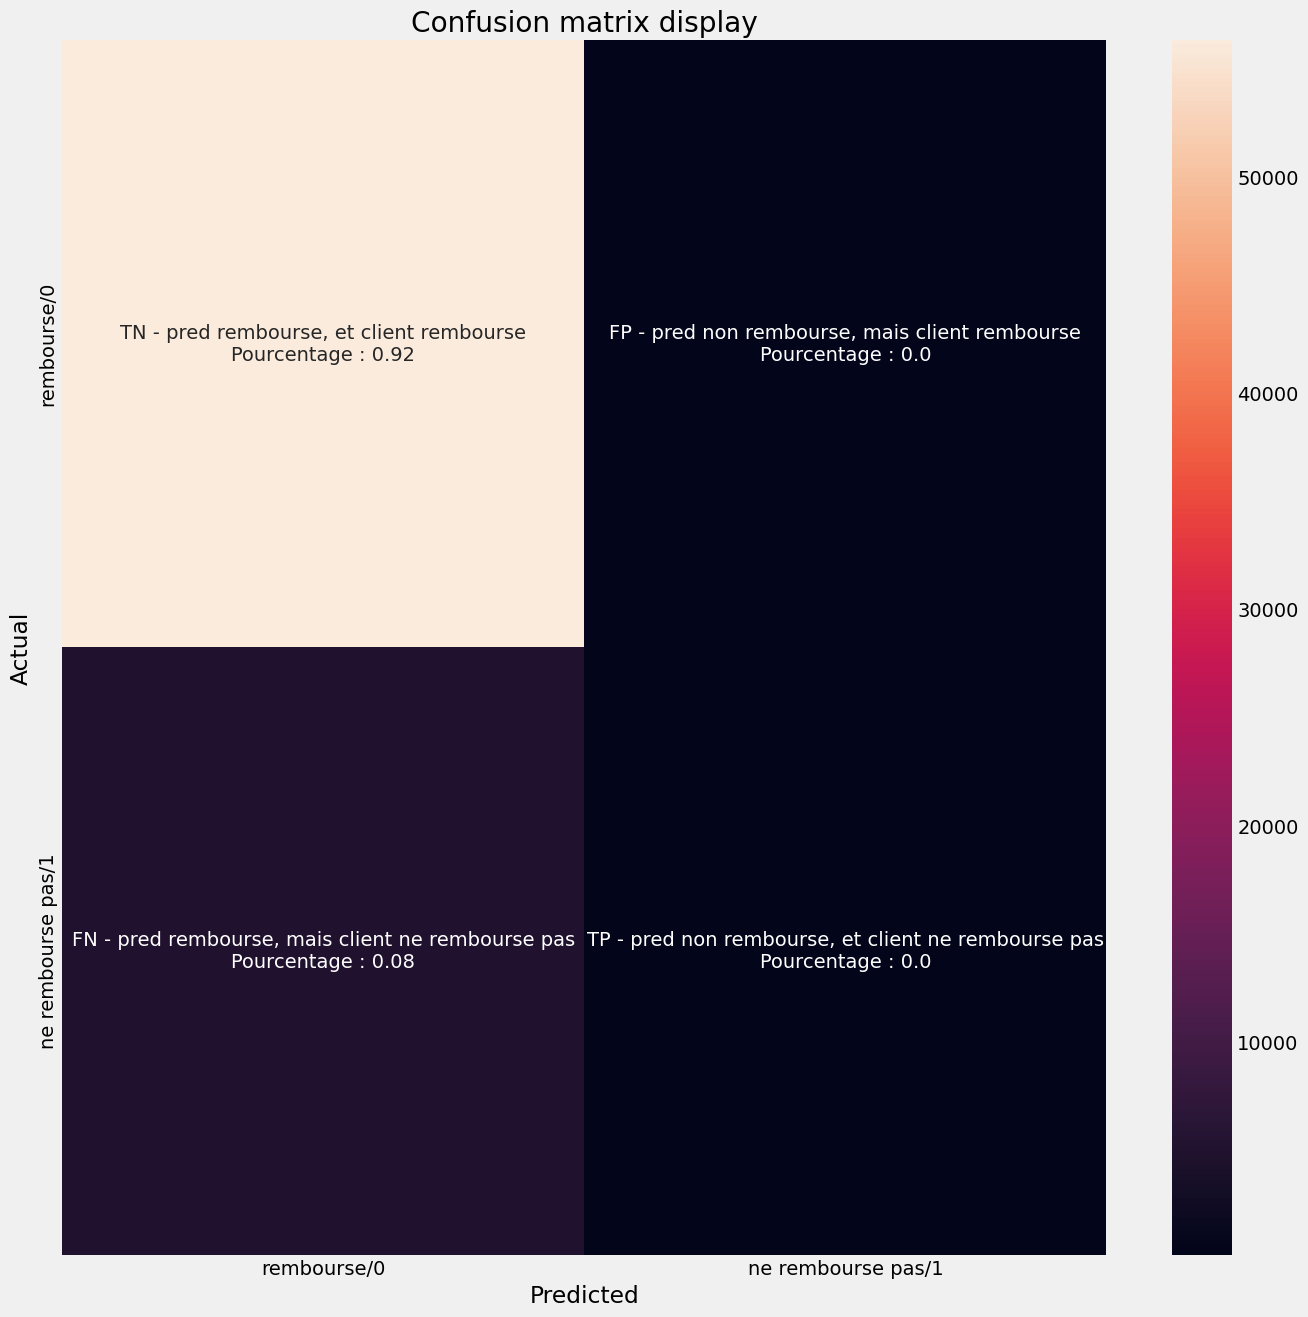

In [116]:
plot_confusion_matrix(test_res_lgbm["confusion_matrix"])

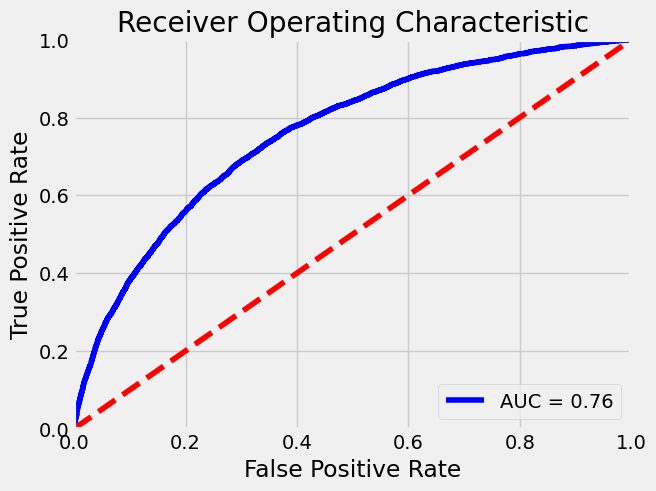

In [117]:
plot_roc_curve(data=test_res_lgbm["roc_auc_curve"], roc_auc_calculated=test_res_lgbm["roc_auc"])

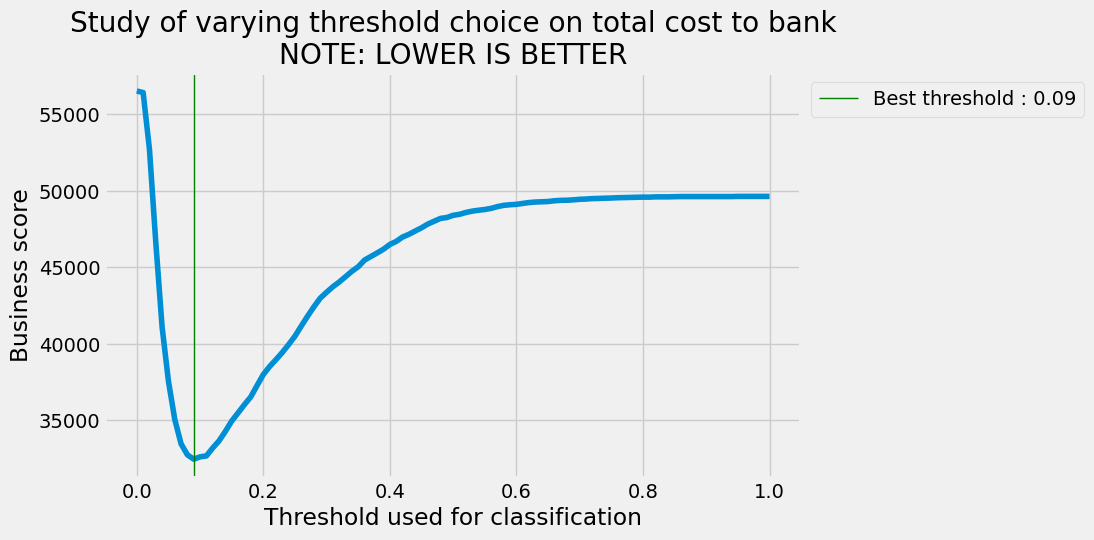

In [118]:
plot_custom_score_for_thresholds(y_predict_probas_lgbm, y_test)

# Saving Light GMB model

In [119]:
import pickle

best_model_name_lgmb = "prod-lgbm.pkl"

with open("/kaggle/working/" + best_model_name_lgmb, "wb") as fo:
    pickle.dump(clf_lgbm, fo)

# Light GBM feature importance

Learnt from here : [https://www.geeksforgeeks.org/lightgbm-feature-importance-and-visualization/](https://www.geeksforgeeks.org/lightgbm-feature-importance-and-visualization/)

[https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html)

In [195]:
from lightgbm import plot_importance

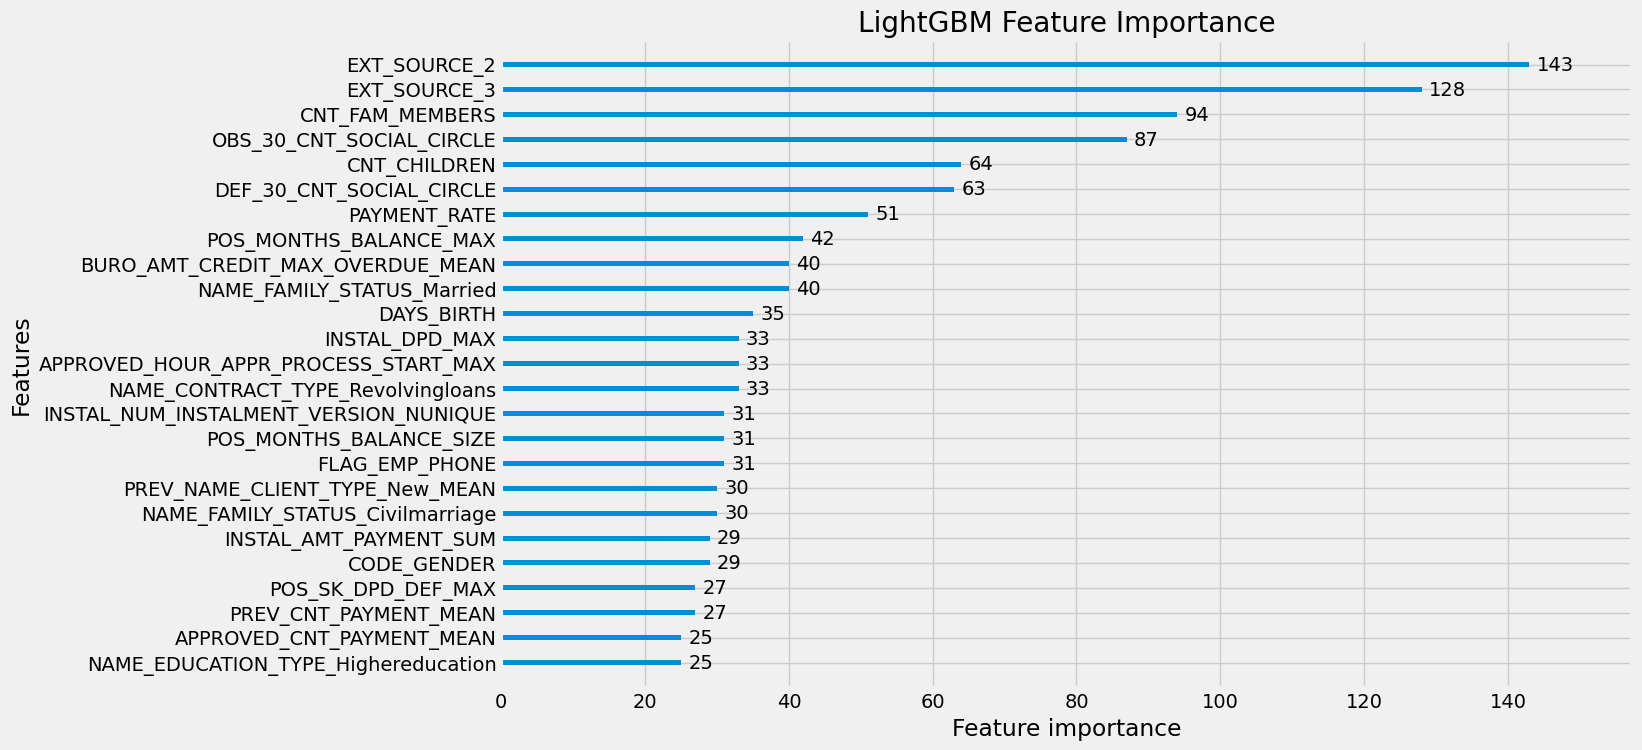

In [194]:
# Plot feature importance
# NOTE: need to set max num features - sinon il les plot toutes!!!
plot_importance(clf_lgbm, figsize=(13, 8), title="LightGBM Feature Importance", max_num_features = 25)

plt.show()

# Analyse SHAP sur modele Light GBM

In [161]:
type(X_test)

pandas.core.frame.DataFrame

In [162]:
explainer_lgbm = shap.TreeExplainer(clf_lgbm) # https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Understanding%20Tree%20SHAP%20for%20Simple%20Models.html


shap_values_lgbm = explainer_lgbm.shap_values(X_test)

In [174]:
explanation_lgbm = explainer_lgbm(X_test)

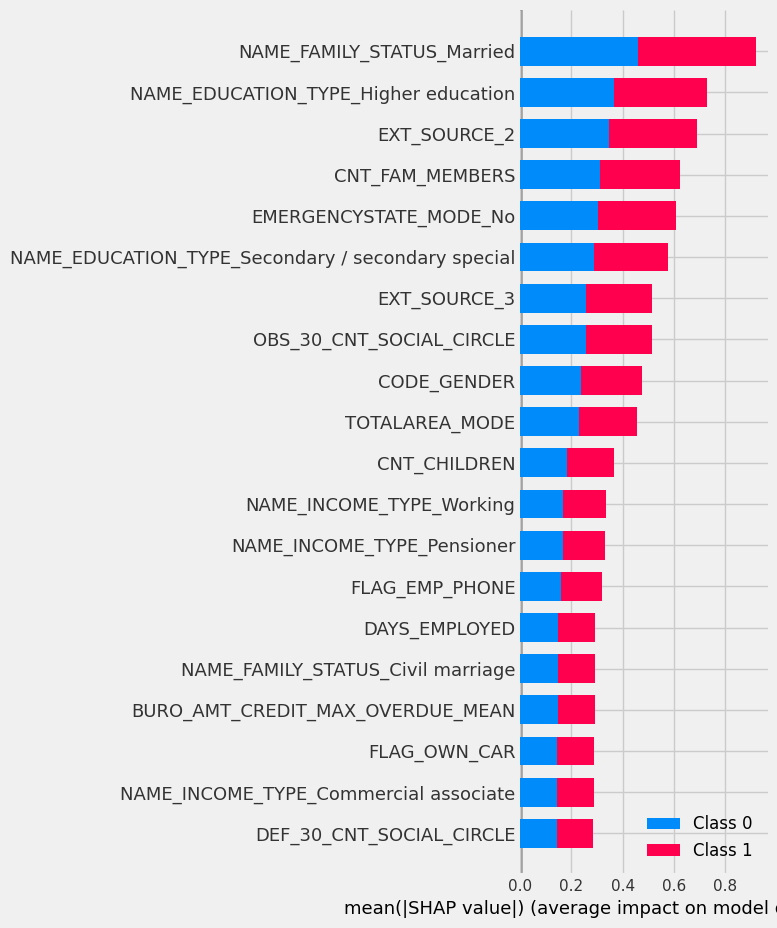

In [163]:
shap.summary_plot(shap_values_lgbm, feature_names=features_from_dataset)

In [173]:
type(shap_values_lgbm)

list

In [176]:
type(explanation_lgbm)

shap._explanation.Explanation

In [181]:
shap.plots.waterfall(shap_values_lgbm[0])

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [182]:
shap.plots.waterfall(explanation_lgbm[0])

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (562, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

# Trying to debug !?

- Je reprend exactement le code de la doc Shap !?!?!?!?

J'ai trouve ceci:

- [https://datainsider.tistory.com/106](https://datainsider.tistory.com/106)
- [https://stackoverflow.com/questions/77689215/how-to-produce-waterfall-plot-using-shapely-from-loaded-xgboost-model](https://stackoverflow.com/questions/77689215/how-to-produce-waterfall-plot-using-shapely-from-loaded-xgboost-model)

et issue github

[https://github.com/shap/shap/issues/2895](https://github.com/shap/shap/issues/2895)

[https://github.com/shap/shap/issues/1420](https://github.com/shap/shap/issues/1420)

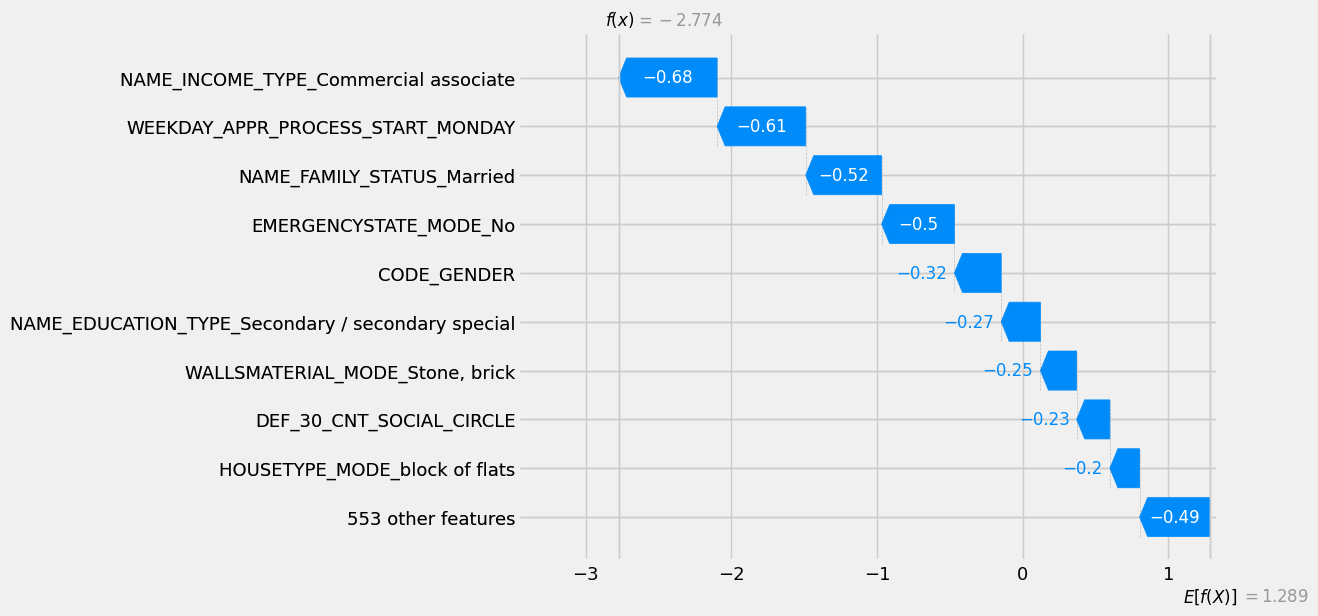

In [189]:
shap.plots._waterfall.waterfall_legacy(explainer_lgbm.expected_value[1], shap_values_lgbm[1][123], feature_names=features_from_dataset)

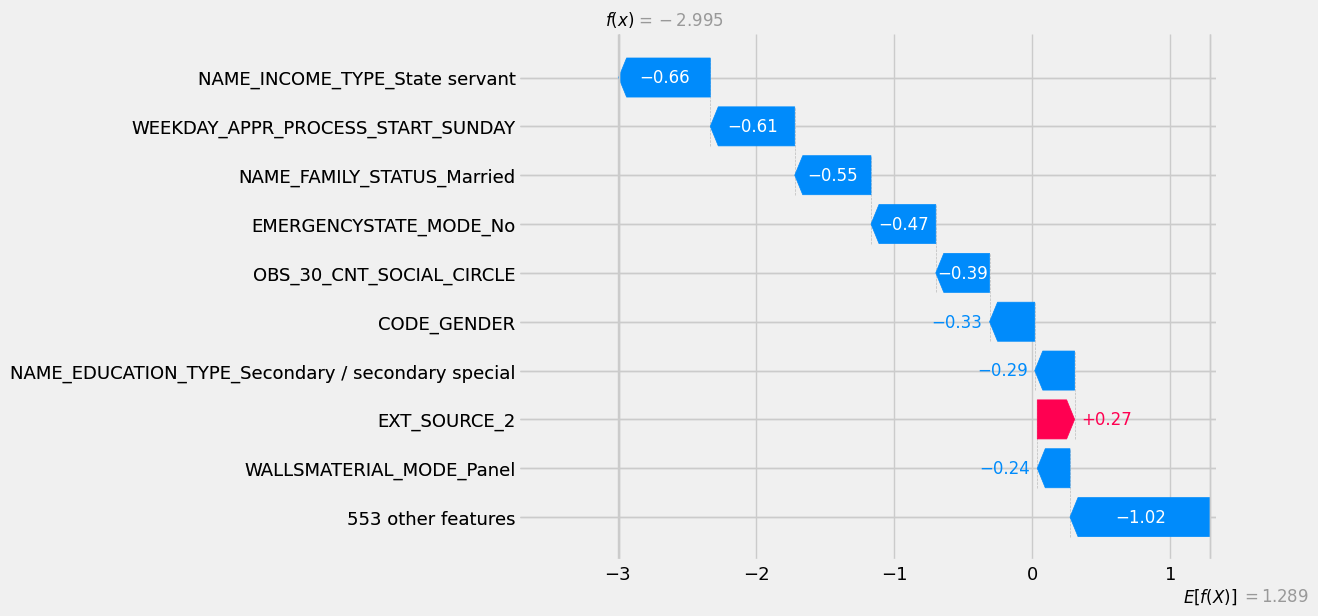

In [190]:
shap.plots._waterfall.waterfall_legacy(explainer_lgbm.expected_value[1], shap_values_lgbm[1][4444], feature_names=features_from_dataset)